In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.max_columns", None)

In [3]:
hr = pd.read_csv("HR_comma_sep.csv")

# Data Analysis

In [4]:
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
print(f"There are {hr.shape[0]} rows and {hr.shape[1]} columns in this dataset.")

There are 14999 rows and 10 columns in this dataset.


In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
hr.duplicated().sum()

3008

In [8]:
hr[hr.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [9]:
hr.drop_duplicates(keep='first', ignore_index=True, inplace=True)

In [10]:
hr.shape

(11991, 10)

In [11]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


In [13]:
def get_nunique(dataframe):
    # checking number of unique values to sort the features into correct types such as
    # ordinal, nominal, discrete, and continuous
    num_uniq_dict = {}
    for column in dataframe.columns:
        unique_val = dataframe[column].nunique()
        num_uniq_dict[column] = unique_val
    return pd.Series(num_uniq_dict)

get_nunique(hr)

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [14]:
hr['time_spend_company'].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [15]:
hr['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

In [16]:
# Rename the columns so that the columns are all standardize into snake_case.
hr.columns = ['satisfaction','evaluation','num_projects','avg_monthly_hours','tenure','accident','turnover','promotion','dept','salary_level']

In [17]:
hr.head()

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,accident,turnover,promotion,dept,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
hr.describe()

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,accident,turnover,promotion
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Data Visualization

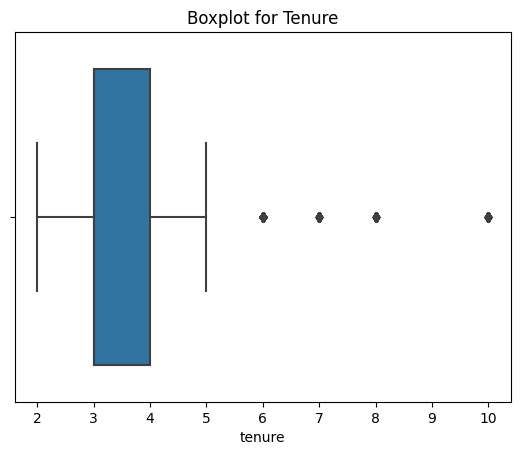

In [19]:
sns.boxplot(hr, x='tenure')
plt.title("Boxplot for Tenure")
plt.show()

In [20]:
hr[hr['tenure']>5].count()['tenure'] # there are 824 rows that are considered outliers

824

In [22]:
hr.tail()

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,accident,turnover,promotion,dept,salary_level
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high
11990,0.50,0.73,4,180,3,0,0,0,IT,low


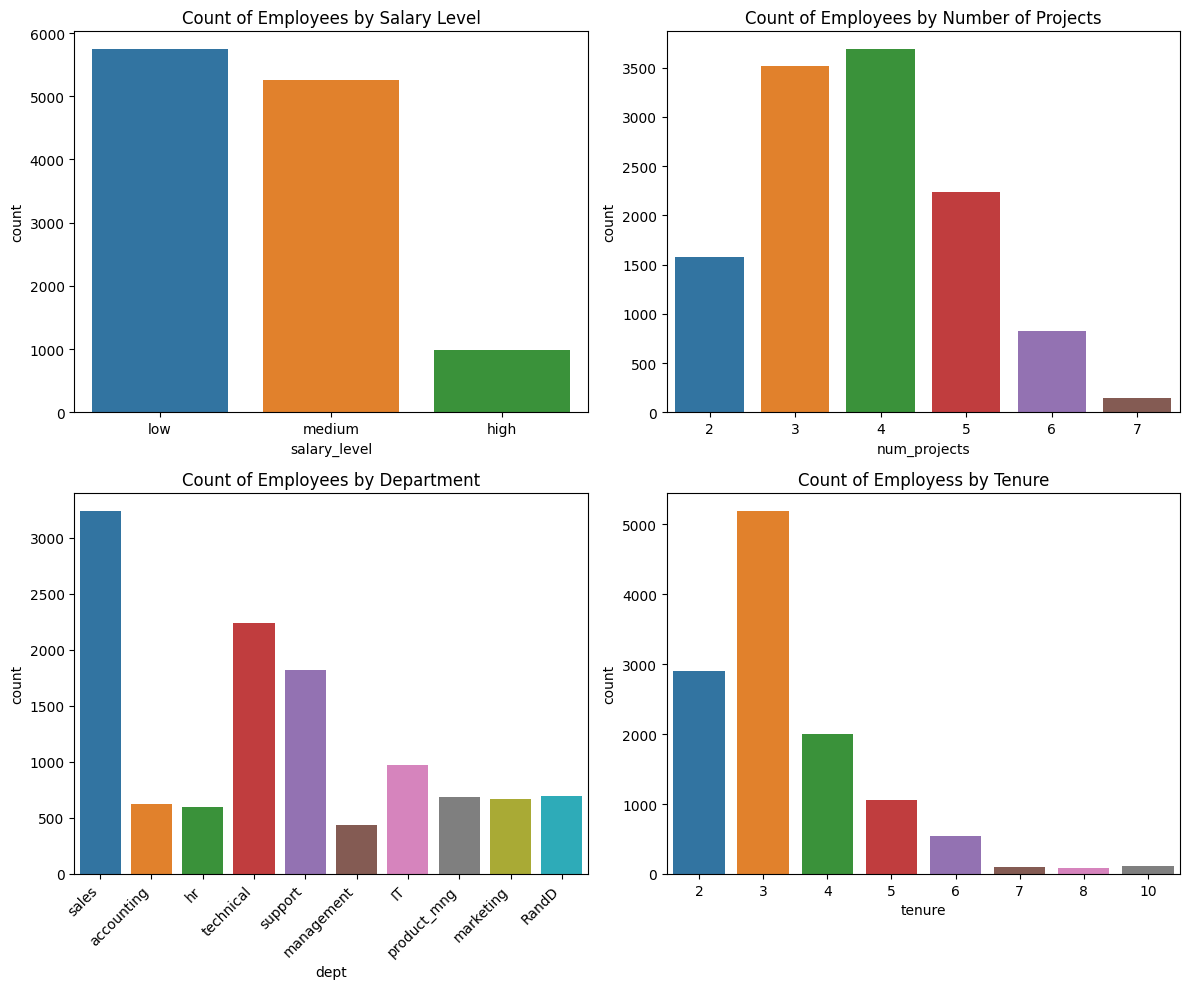

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.countplot(x=hr['salary_level'], ax=axes[0,0])
axes[0,0].set_title("Count of Employees by Salary Level")

sns.countplot(x=hr['num_projects'], ax=axes[0,1])
axes[0,1].set_title("Count of Employees by Number of Projects")

sns.countplot(x=hr['dept'], ax=axes[1,0])
axes[1,0].set_title("Count of Employees by Department")
plt.setp(axes[1,0].get_xticklabels(), rotation=45, ha='right')

sns.countplot(x=hr['tenure'], ax=axes[1,1])
axes[1,1].set_title("Count of Employess by Tenure")

plt.tight_layout()
plt.show()

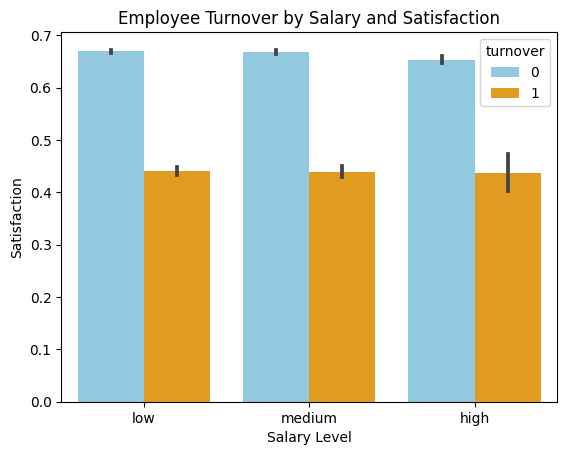

In [24]:
sns.barplot(data=hr, x='salary_level', y='satisfaction', hue='turnover', palette=['skyblue', 'orange'],
errorbar='se')
plt.title("Employee Turnover by Salary and Satisfaction")
plt.xlabel("Salary Level")
plt.ylabel("Satisfaction")
plt.show()

In [25]:
dept_turnover = hr.groupby('dept').agg({'turnover':['sum','count']}).reset_index()

dept_turnover.columns = pd.MultiIndex.from_tuples([('dept', 'dept'),('sum_turnover', 'sum_turnover'), ('count_turnover','count_turnover')], names=['index', 'lev2'])

dept_turnover = dept_turnover.droplevel('lev2', axis=1)

dept_turnover['ratio'] = round(((dept_turnover['sum_turnover'] / dept_turnover['count_turnover'])*100),2)

dept_turnover.sort_values(by='ratio', ascending=False).reset_index(drop=True)

index,dept,sum_turnover,count_turnover,ratio
0,hr,113,601,18.80
1,accounting,109,621,17.55
2,technical,390,2244,17.38
3,support,312,1821,17.13
4,sales,550,3239,16.98
5,marketing,112,673,16.64
6,IT,158,976,16.19
7,product_mng,110,686,16.03
8,RandD,85,694,12.25
9,management,52,436,11.93


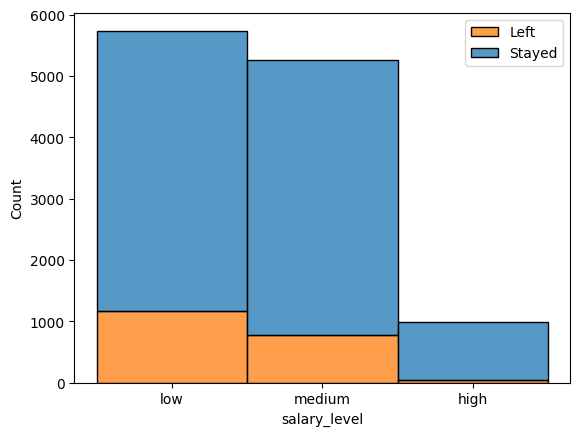

In [26]:
sns.histplot(data=hr, x='salary_level', hue='turnover', multiple='stack')
plt.legend(labels=['Left', 'Stayed'])
plt.show()

In [27]:
#Let's see which department's working hour is the longest.
hr.groupby('dept')[['avg_monthly_hours']].mean().sort_values(by='avg_monthly_hours').reset_index()

,dept,avg_monthly_hours
0,product_mng,198.893586
1,hr,199.371048
2,marketing,199.487370
3,sales,200.242050
4,support,200.627128
5,IT,200.638320
6,accounting,200.877617
7,technical,201.115419
8,RandD,201.291066
9,management,201.529817


In [28]:
hr.select_dtypes(exclude='object').corr()['turnover']

satisfaction        -0.350558
evaluation           0.013520
num_projects         0.030928
avg_monthly_hours    0.070409
tenure               0.173295
accident            -0.125436
turnover             1.000000
promotion           -0.044657
Name: turnover, dtype: float64

In [37]:
# Change the ordinal feature salary level to numeric.
hr['salary_level'] = hr['salary_level'].map(lambda x: 1 if x=='low' else 2 if x=='medium' else 3)

In [38]:
# Ratio between tenure and projects to see how many number of projects the employee has worked on
# during the time in company.

hr['tenure_project_ratio'] = round((hr['num_projects']/hr['tenure']),4)

# Making two features that tells whether the employees evaluation and satisfaction was higher
# than the average by the departments.

avg_evaluation = hr.groupby('dept')['evaluation'].mean()
hr['avg_evaluation'] = hr['dept'].replace(avg_evaluation.to_dict())
hr['avg_evaluation'] = round(hr['avg_evaluation'], 2)
hr['evaluation_comp'] = hr['evaluation']/hr['avg_evaluation']
hr['evaluation_comp'] = hr['evaluation_comp'].map(lambda x: 1 if x >= 1 else 0)
avg_satisfaction = hr.groupby('dept')['satisfaction'].mean()
hr['avg_satisfaction'] = hr['dept'].replace(avg_satisfaction.to_dict())
hr['avg_satisfaction'] = round(hr['avg_satisfaction'], 2)
hr['satisfaction_comp'] = hr['satisfaction']/hr['avg_satisfaction']
hr['satisfaction_comp'] = hr['satisfaction_comp'].map(lambda x: 1 if x >= 1 else 0)

hr.drop(columns=['avg_evaluation', 'avg_satisfaction'], inplace=True)

In [41]:
def skew_check(dataframe):
    skew_dict={}
    for column in dataframe.columns:
        if dataframe[column].dtype != 'object':
            skew = dataframe[column].skew()
            skew_dict[column] = skew
    return pd.Series(skew_dict)

In [42]:
skew_check(hr)

satisfaction           -0.538702
evaluation             -0.031686
num_projects            0.332152
avg_monthly_hours       0.027208
tenure                  1.816577
accident                1.914410
turnover                1.795135
promotion               7.490008
salary_level            0.570024
tenure_project_ratio    0.677469
evaluation_comp        -0.040544
satisfaction_comp      -0.213559
dtype: float64

In [43]:
scaler = MinMaxScaler()

numeric = hr[hr.select_dtypes(exclude='object').columns]
numeric = numeric.drop(columns='turnover')
scaled_hr = pd.DataFrame(scaler.fit_transform(numeric), columns=numeric.columns)

scaled_hr.head()

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,accident,promotion,salary_level,tenure_project_ratio,evaluation_comp,satisfaction_comp
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,0.141424,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.5,0.191909,1.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.5,0.469697,1.0,0.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.0,0.242424,1.0,1.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,0.141424,0.0,0.0


In [44]:
hr.shape

(11991, 13)

In [45]:
hr_subset = scaled_hr.join(hr['dept'])
hr_subset = hr_subset.join(hr['turnover'])
hr_subset

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,accident,promotion,salary_level,tenure_project_ratio,evaluation_comp,satisfaction_comp,dept,turnover
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,0.141424,0.0,0.0,sales,1
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.5,0.191909,1.0,1.0,sales,1
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.5,0.469697,1.0,0.0,sales,1
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.0,0.242424,1.0,1.0,sales,1
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,0.141424,0.0,0.0,sales,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11986,0.890110,0.296875,0.2,0.761682,1.000,1.0,1.0,1.0,0.030303,0.0,1.0,management,0
11987,0.714286,0.921875,0.6,0.794393,1.000,0.0,1.0,1.0,0.090909,1.0,1.0,management,0
11988,0.835165,0.281250,0.2,0.415888,1.000,0.0,1.0,1.0,0.030303,0.0,1.0,management,0
11989,0.263736,0.453125,0.2,0.355140,1.000,0.0,1.0,1.0,0.030303,0.0,0.0,marketing,0


In [46]:
hr_subset = pd.get_dummies(data=hr_subset, columns=['dept'], dtype='int')

hr_subset.head(10)

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,accident,promotion,salary_level,tenure_project_ratio,evaluation_comp,satisfaction_comp,turnover,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,0.141424,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.5,0.191909,1.0,1.0,1,0,0,0,0,0,0,0,1,0,0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.5,0.469697,1.0,0.0,1,0,0,0,0,0,0,0,1,0,0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.0,0.242424,1.0,1.0,1,0,0,0,0,0,0,0,1,0,0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,0.141424,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0
5,0.351648,0.218750,0.0,0.266355,0.125,0.0,0.0,0.0,0.141424,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0
6,0.010989,0.640625,0.8,0.705607,0.250,0.0,0.0,0.0,0.393939,1.0,0.0,1,0,0,0,0,0,0,0,1,0,0
7,0.912088,0.765625,0.6,0.761682,0.375,0.0,0.0,0.0,0.242424,1.0,1.0,1,0,0,0,0,0,0,0,1,0,0
8,0.879121,1.000000,0.6,0.598131,0.375,0.0,0.0,0.0,0.242424,1.0,1.0,1,0,0,0,0,0,0,0,1,0,0
9,0.362637,0.265625,0.0,0.214953,0.125,0.0,0.0,0.0,0.141424,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0


# Logistic Regression

In [48]:
# Separate the dataset as train and test

y = hr_subset['turnover']
x = hr_subset.drop(columns='turnover')

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=0)

In [49]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8993, 21), (2998, 21), (8993,), (2998,))

In [50]:
# Build base model using LogisticRegression

logi = LogisticRegression()

logi.fit(x_train, y_train)

logi_pred = logi.predict(x_test)

logi_pred

array([0, 1, 0, ..., 0, 0, 0])

In [51]:
print("Accuracy Score:", accuracy_score(y_test, logi_pred))
print("Precision Score:", precision_score(y_test, logi_pred))
print("Recall Score:", recall_score(y_test, logi_pred))
print("F1 Score:", f1_score(y_test, logi_pred))

Accuracy Score: 0.8372248165443629
Precision Score: 0.5219298245614035
Recall Score: 0.2389558232931727
F1 Score: 0.3278236914600551


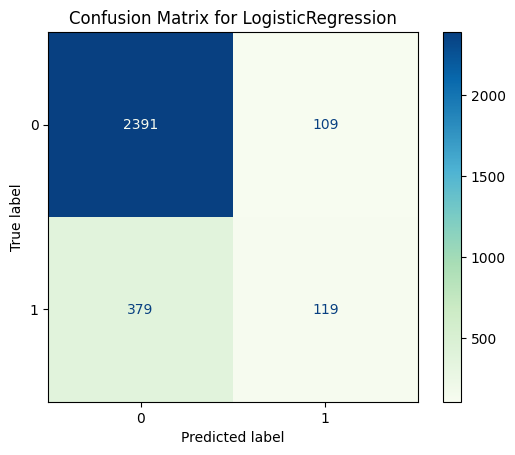

In [52]:
logi_cm = confusion_matrix(y_test, logi_pred, labels=logi.classes_)

logi_display = ConfusionMatrixDisplay(confusion_matrix=logi_cm, display_labels=logi.classes_)

logi_display.plot(values_format='', cmap='GnBu') #values_format removes scientific notation
plt.title("Confusion Matrix for LogisticRegression")
plt.show()